In [1]:
import pandas as pd;
import numpy as np;
import plotly.express as px; #daha pratik görselleştirme yapabilmemizi sağlar
from textblob import TextBlob; #duyarlılık analizi. Mesela en çok filmi olan 5 yönetmeni bulup sıralıcaz ve bunlara en başarılı yönetmenler diyeceğiz. 

In [2]:
dt = pd.read_csv("netflix_titles.csv")
# Özet Bilgileri Görme (Sütun ve satır sayısını verir)
dt.shape

(8807, 12)

In [3]:
dt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

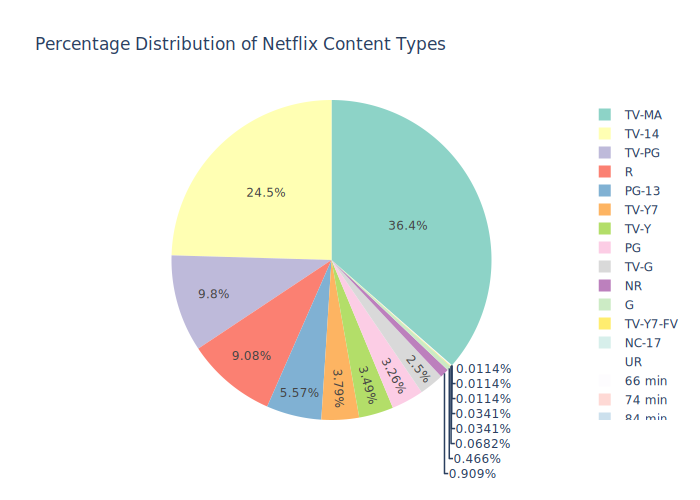

In [8]:
# qualitative.Set3 plotly'den gelen bir renk özelliği. Farklı bir renk de kullanabiliriz.

x = dt.groupby(["rating"]).size().reset_index(name="counts")
pieChart = px.pie(x,
                 values="counts",
                 names="rating",
                 title="Percentage Distribution of Netflix Content Types",
                 color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show("svg")

# TOP 5 DIRECTORS

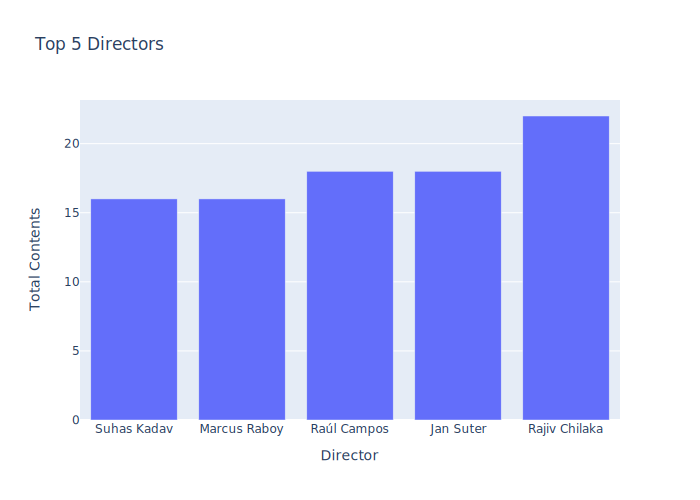

In [7]:
# Eksik veri olan değerleri "No Director Found" ile değiştirip veri atamış olduk
dt["director"] = dt["director"].fillna("No Director Found")
# Var olan yönetmen verilerini DataFrame yapısına dönüştürme
filtered_director = pd.DataFrame()
# Filtrelenmiş yönetmen verilerini ayırma(split) ve yığınlar(stack) haline getirme işlemi. Director sütunundaki verileri string olduğu için "str" şeklinde belirtmemiz gerekiyor
filtered_director = dt["director"].str.split(",", expand=True).stack()
# Ayrılan yığınları tablo yapısına(to_frame) aktarma
filtered_director = filtered_director.to_frame()
# Oluşan tabloya sütun ismi belirleme
filtered_director.columns = ["Director"]
# Filtrelenmiş yönetmenleri gruplandırıp(groupby) yeniden adlandırma(reset_index)
directors = filtered_director.groupby(["Director"]).size().reset_index(name="Total Contents")
# No Director Found ifadesi içeren veri sorgulama
directors = directors[directors.Director != "No Director Found"]
# Gruplandırılan verilerin sıralamasını/düzenlemesini(sort) gerçekleştirme
directors = directors.sort_values(by=["Total Contents"], ascending=False)
# Top 5 Directors (10,20,30,... gibi farklı değer isteseydik head içine o değeri yazardık)
top5directors = directors.head()
# Oluşturulan Top 5 Directors listesinin içerisinde anlamlı bir sıralama işleminin yapılması
top5directors = top5directors.sort_values(by=["Total Contents"])
# Bar grafiğinin oluşturulması
graph = px.bar(top5directors, x="Director", y="Total Contents", title="Top 5 Directors")
graph.show("svg")